# Analysis
This time (06/04/2018), northern hemisphere is summer while southern now is winter season so:
 - Temperature ranges in Northern Hemisphere are greater than the southern ranges at corresponding latitudes.Northern Hemisphere is also higher temperature than southern now
 - Humidity ranges in Northern Hemisphere are greater than the southern ranges at corresponding latitudes.Northern Hemisphere's Humidity is also higher than southern now
 - Wind speed ranges in Northern Hemisphere are greater than the southern ranges at corresponding latitudes.Northern Hemisphere's wind speed is also stronger than southern now

In [ ]:
!pip install citipy

In [ ]:
import csv
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
from citipy import citipy
import random
import sys
import math
from config import api_key
import json
import requests
import numpy

In [3]:
#Create latitude & longitude
lat = []
lon=[]
for i in range(1,10000):                 #number of Lat Long (in this case 10000) to be generated
 lat.append(float("{:.2f}".format(random.uniform(-90.0,90.0))))
 lon.append(float("{:.2f}".format(random.uniform(-180.0,180.0))))

In [4]:
#Create a list of cities match with lat & long
cities = []
name = []
country_code = []
for k in range(len(lat)):
    cities.append(citipy.nearest_city(lat[k], lon[k]))
for city in cities:
    country_code.append(city.country_code)
    name.append(city.city_name)
    #print(f"The country code of {name} is '{country_code}'.")
cities_df = pd.DataFrame({"Lat":lat,"Lon":lon,"City Name":name,"Country Code":country_code})
#Drop duplicate Cities by using City Name
cities_df.drop_duplicates(subset=['City Name'],inplace=True)
cities_df.to_csv("nearestcities.csv", index = False)
len(cities_df)

2235

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial" # to get weather data in Fahrenheit degree and wind speed in MPH
temp=[]
humidity=[]
cloud=[]
wind=[]
cityname=[]
countrycode=[]
lati=[]
long=[]
check=""
citinumber = 1
# Build partial query URL
query_url =  f"{url}appid={api_key}&units={units}&q="
i=0
print("Beginning Data Retrieval")
print("------------------------")
while i <= len(cities_df):
    try:
        response = requests.get(query_url + cities_df['City Name'][i]).json()
        response["main"]["temp"] #checking if wrong City Name, will only show KeyError once we look for a index,example 'main' index
    except KeyError:
        check = "KeyError"
        pass
    if check != "KeyError": # to make sure same length of each column, if try to push "withdrawing data" in Try then length of column will not same or have to use DROPNA,as able to fetching columns' NaN values
        print(f"Processing Record {citinumber} of Set {citinumber} | {cities_df['City Name'][i]}")
        print(f"{query_url}{cities_df['City Name'][i]}")
        cityname.append(cities_df['City Name'][i])
        countrycode.append(cities_df['Country Code'][i])
        lati.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        citinumber=citinumber+1
    i=i+1
    check = "check"
final_df= pd.DataFrame({"City Name":cityname,"Country Code":countrycode,"Latitude":lati,"Longitude":long,"Temperature":temp,"Humidity":humidity,"Cloudness":cloud,"Wind":wind})
#Again execute a drop duplicate command on City Name to make sure this dataframe will only contain  unique cities
final_df.drop_duplicates(subset=['City Name'],inplace=True)
final_df.to_csv("weather.csv", index = False)
print(citinumber-1)
print(len(final_df))
final_df.head()

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saldanha
Processing Record 2 of Set 2 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tiksi
Processing Record 3 of Set 3 | halifax
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=halifax
Processing Record 4 of Set 4 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port elizabeth
Processing Record 5 of Set 5 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saskylakh
Processing Record 6 of Set 6 | kalmunai
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kalmunai
Processing Record 7 of Set 7 | v

Processing Record 54 of Set 54 | najran
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=najran
Processing Record 55 of Set 55 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=fortuna
Processing Record 56 of Set 56 | castro
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=castro
Processing Record 57 of Set 57 | albania
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=albania
Processing Record 58 of Set 58 | cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cherskiy
Processing Record 59 of Set 59 | lompoc
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lompoc
Processing Record 60 of Set 60 | ha tinh
http://api.openweathermap.org/data/2.5/weather?appi

Processing Record 108 of Set 108 | mala
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mala
Processing Record 109 of Set 109 | padang
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=padang
Processing Record 110 of Set 110 | katsuura
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=katsuura
Processing Record 111 of Set 111 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=narsaq
Processing Record 112 of Set 112 | kirkwood
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kirkwood
Processing Record 113 of Set 113 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=butaritari
Processing Record 114 of Set 114 | bubaque
http://api.openweathermap.org/dat

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=new norfolk
Processing Record 162 of Set 162 | adrar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=adrar
Processing Record 163 of Set 163 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hilo
Processing Record 164 of Set 164 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=luderitz
Processing Record 165 of Set 165 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=georgetown
Processing Record 166 of Set 166 | mbala
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mbala
Processing Record 167 of Set 167 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc

Processing Record 214 of Set 214 | bonavista
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bonavista
Processing Record 215 of Set 215 | hualmay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hualmay
Processing Record 216 of Set 216 | tiznit
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tiznit
Processing Record 217 of Set 217 | brae
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=brae
Processing Record 218 of Set 218 | jumla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=jumla
Processing Record 219 of Set 219 | polyarnyy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=polyarnyy
Processing Record 220 of Set 220 | torbay
http://api.openweathermap.org/data/2.5

Processing Record 267 of Set 267 | algeciras
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=algeciras
Processing Record 268 of Set 268 | the valley
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=the valley
Processing Record 269 of Set 269 | oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=oranjemund
Processing Record 270 of Set 270 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=aklavik
Processing Record 271 of Set 271 | paciran
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=paciran
Processing Record 272 of Set 272 | bonthe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bonthe
Processing Record 273 of Set 273 | waingapu
http://api.openwea

Processing Record 320 of Set 320 | east london
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=east london
Processing Record 321 of Set 321 | pacasmayo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pacasmayo
Processing Record 322 of Set 322 | saint-paul
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint-paul
Processing Record 323 of Set 323 | sibolga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sibolga
Processing Record 324 of Set 324 | navrongo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=navrongo
Processing Record 325 of Set 325 | vanavara
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vanavara
Processing Record 326 of Set 326 | weihai
http://api.o

Processing Record 373 of Set 373 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kudahuvadhoo
Processing Record 374 of Set 374 | sawakin
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sawakin
Processing Record 375 of Set 375 | bowen
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bowen
Processing Record 376 of Set 376 | beatrice
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=beatrice
Processing Record 377 of Set 377 | pochutla
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pochutla
Processing Record 378 of Set 378 | bakchar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bakchar
Processing Record 379 of Set 379 | erbach
http://api.openweatherma

Processing Record 426 of Set 426 | anori
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=anori
Processing Record 427 of Set 427 | coos bay
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=coos bay
Processing Record 428 of Set 428 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=severo-kurilsk
Processing Record 429 of Set 429 | kabinda
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kabinda
Processing Record 430 of Set 430 | svetlaya
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=svetlaya
Processing Record 431 of Set 431 | itacare
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=itacare
Processing Record 432 of Set 432 | nouakchott
http://api.openw

Processing Record 479 of Set 479 | seagoville
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=seagoville
Processing Record 480 of Set 480 | vacha
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vacha
Processing Record 481 of Set 481 | cayenne
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cayenne
Processing Record 482 of Set 482 | inyonga
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=inyonga
Processing Record 483 of Set 483 | auki
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=auki
Processing Record 484 of Set 484 | isakly
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=isakly
Processing Record 485 of Set 485 | vilhena
http://api.openweathermap.org/data/2.5/

Processing Record 532 of Set 532 | ramnagar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ramnagar
Processing Record 533 of Set 533 | azua
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=azua
Processing Record 534 of Set 534 | port hueneme
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port hueneme
Processing Record 535 of Set 535 | yarada
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yarada
Processing Record 536 of Set 536 | nanning
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nanning
Processing Record 537 of Set 537 | cruzilia
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cruzilia
Processing Record 538 of Set 538 | pangnirtung
http://api.openweatherm

Processing Record 585 of Set 585 | valleyview
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=valleyview
Processing Record 586 of Set 586 | friendswood
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=friendswood
Processing Record 587 of Set 587 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=leningradskiy
Processing Record 588 of Set 588 | pechora
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pechora
Processing Record 589 of Set 589 | pouebo
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pouebo
Processing Record 590 of Set 590 | dragor
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=dragor
Processing Record 591 of Set 591 | natchitoches
http:/

Processing Record 638 of Set 638 | flin flon
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=flin flon
Processing Record 639 of Set 639 | aneho
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=aneho
Processing Record 640 of Set 640 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vestmannaeyjar
Processing Record 641 of Set 641 | tobermory
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tobermory
Processing Record 642 of Set 642 | usinsk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=usinsk
Processing Record 643 of Set 643 | misratah
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=misratah
Processing Record 644 of Set 644 | wajir
http://api.openwe

Processing Record 692 of Set 692 | nefteyugansk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nefteyugansk
Processing Record 693 of Set 693 | piacabucu
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=piacabucu
Processing Record 694 of Set 694 | noumea
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=noumea
Processing Record 695 of Set 695 | hami
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hami
Processing Record 696 of Set 696 | songjianghe
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=songjianghe
Processing Record 697 of Set 697 | zaraza
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=zaraza
Processing Record 698 of Set 698 | mount gambier
http://api.open

,City Name,Cloudness,Country Code,Humidity,Latitude,Longitude,Temperature,Wind
0,saldanha,32,za,91,41.42,-6.55,47.81,3.38
1,tiksi,0,ru,76,71.64,128.87,50.78,13.67
2,halifax,20,ca,87,44.65,-63.58,45.61,2.24
3,port elizabeth,90,za,72,39.31,-74.98,62.94,3.36
4,saskylakh,0,ru,70,71.97,114.09,58.34,5.17


# Temperature (F) vs. Latitude

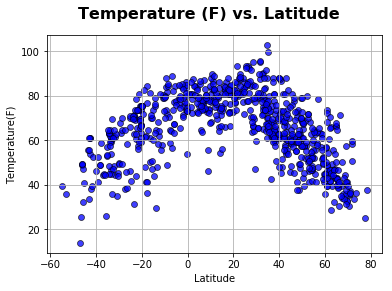

In [6]:
plt.scatter(final_df['Latitude'],final_df['Temperature'],alpha=0.75,c='blue',edgecolor='black',linewidths=0.75)
plt.suptitle("Temperature (F) vs. Latitude", fontsize = 16, fontweight="bold")
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.grid()
plt.savefig("Images/temperaturelatitude.png")
plt.show()

# Humidity (%) vs. Latitude

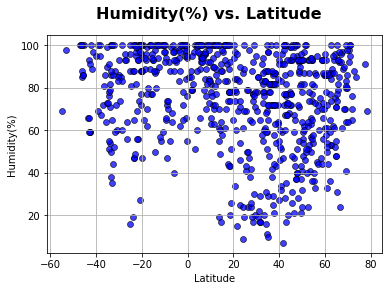

In [7]:
plt.scatter( final_df['Latitude'],final_df['Humidity'],alpha=0.75,c='blue',edgecolor='black',linewidths=0.75)
plt.suptitle("Humidity(%) vs. Latitude", fontsize = 16, fontweight="bold")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.savefig("Images/humiditylatitude.png")
plt.show()

# Cloudiness (%) vs. Latitude

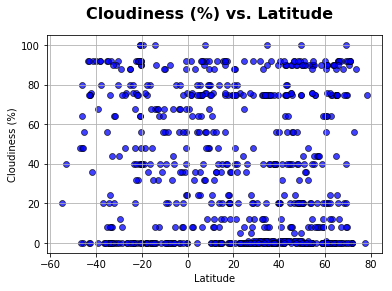

In [8]:
plt.scatter(final_df['Latitude'],final_df['Cloudness'],alpha=0.75,c='blue',edgecolor='black',linewidths=0.75)
plt.suptitle("Cloudiness (%) vs. Latitude", fontsize = 16, fontweight="bold")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("Images/cloudinesslatitude.png")
plt.show()

# Wind Speed (mph) vs. Latitude

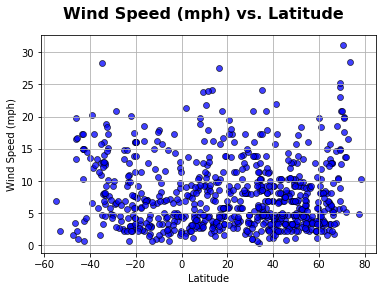

In [9]:
plt.scatter(final_df['Latitude'],final_df['Wind'],alpha=0.75,c='blue',edgecolor='black',linewidths=0.75)
plt.suptitle("Wind Speed (mph) vs. Latitude", fontsize = 16, fontweight="bold")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Images/windspeedlatitude.png")
plt.show()